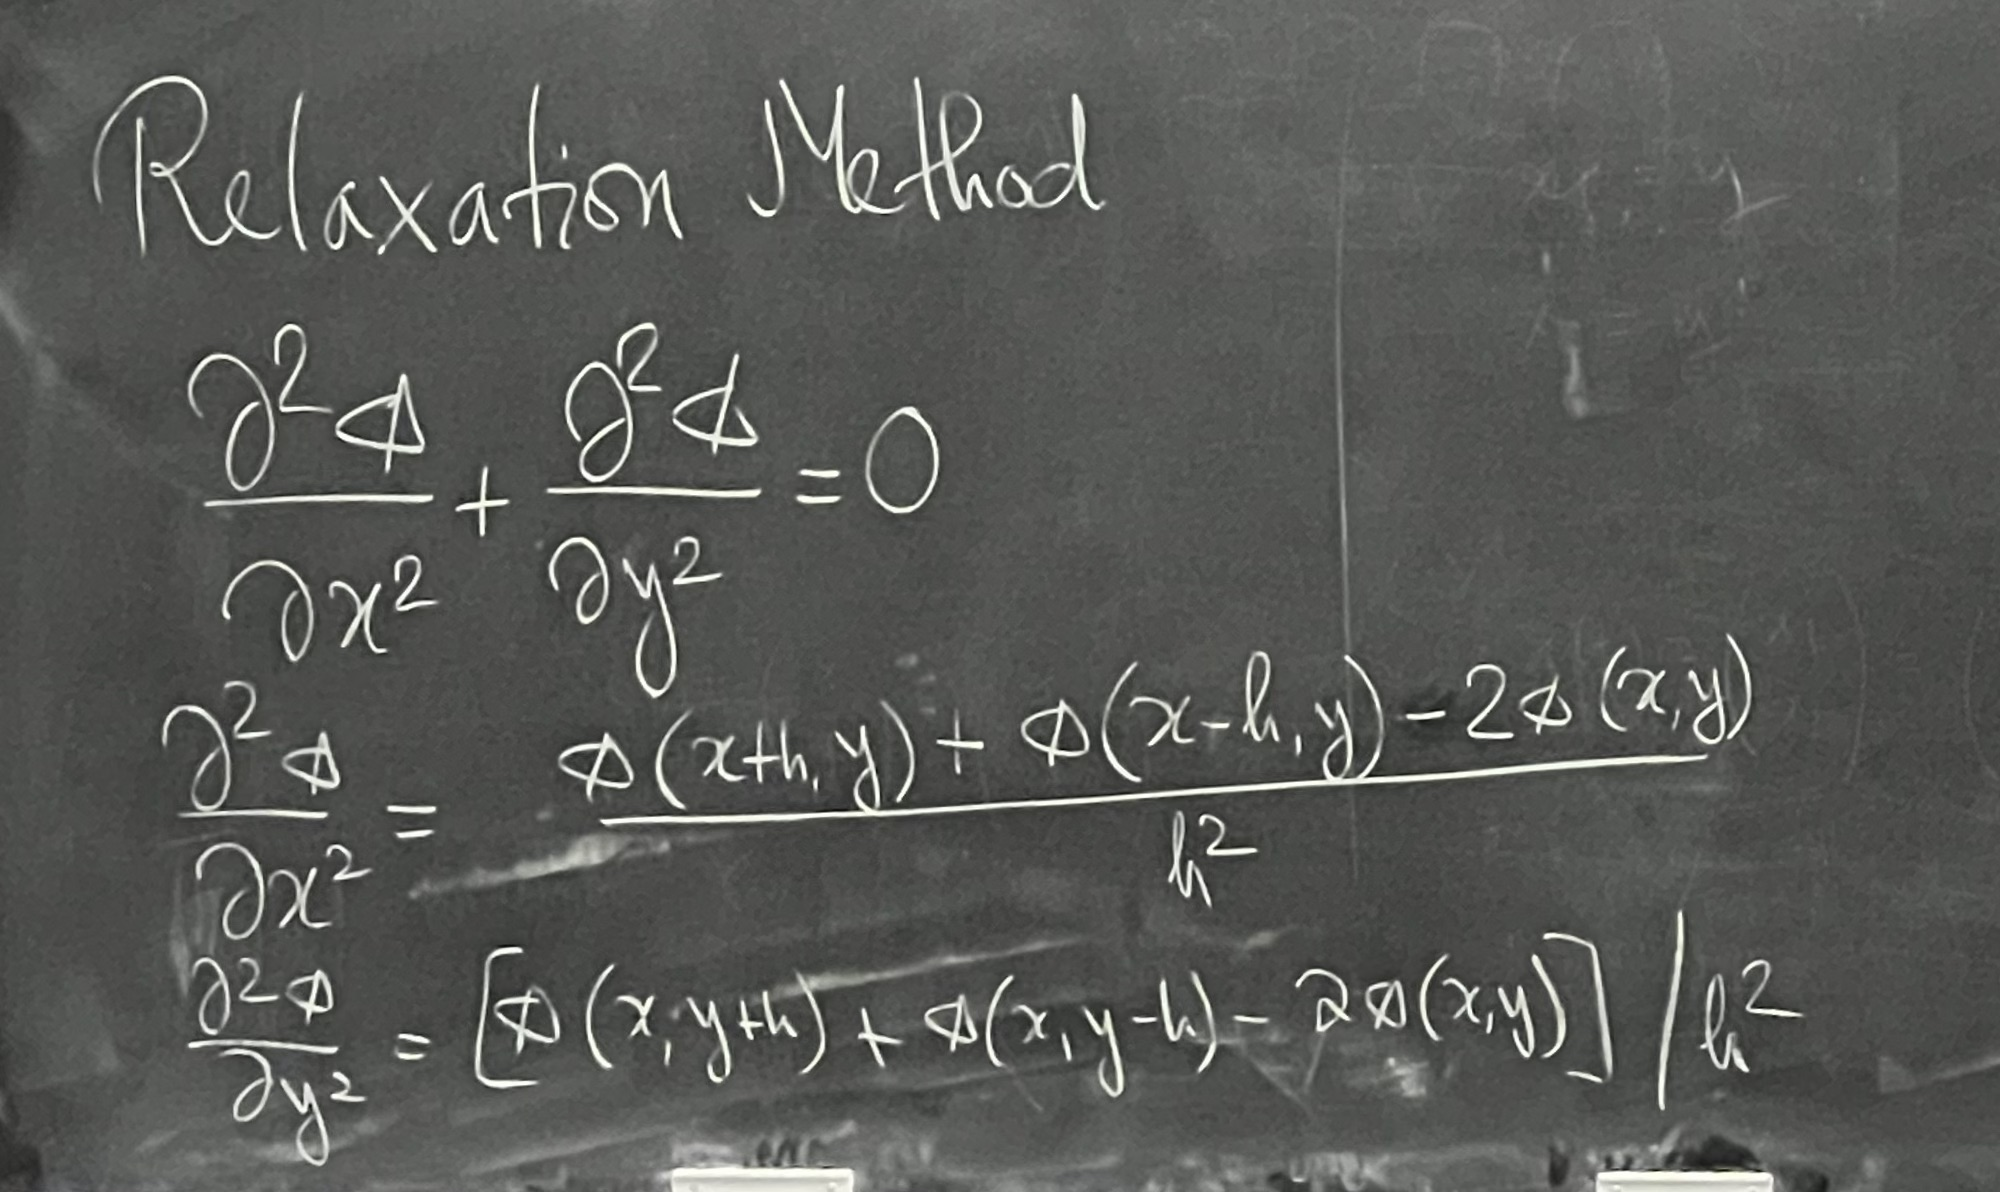

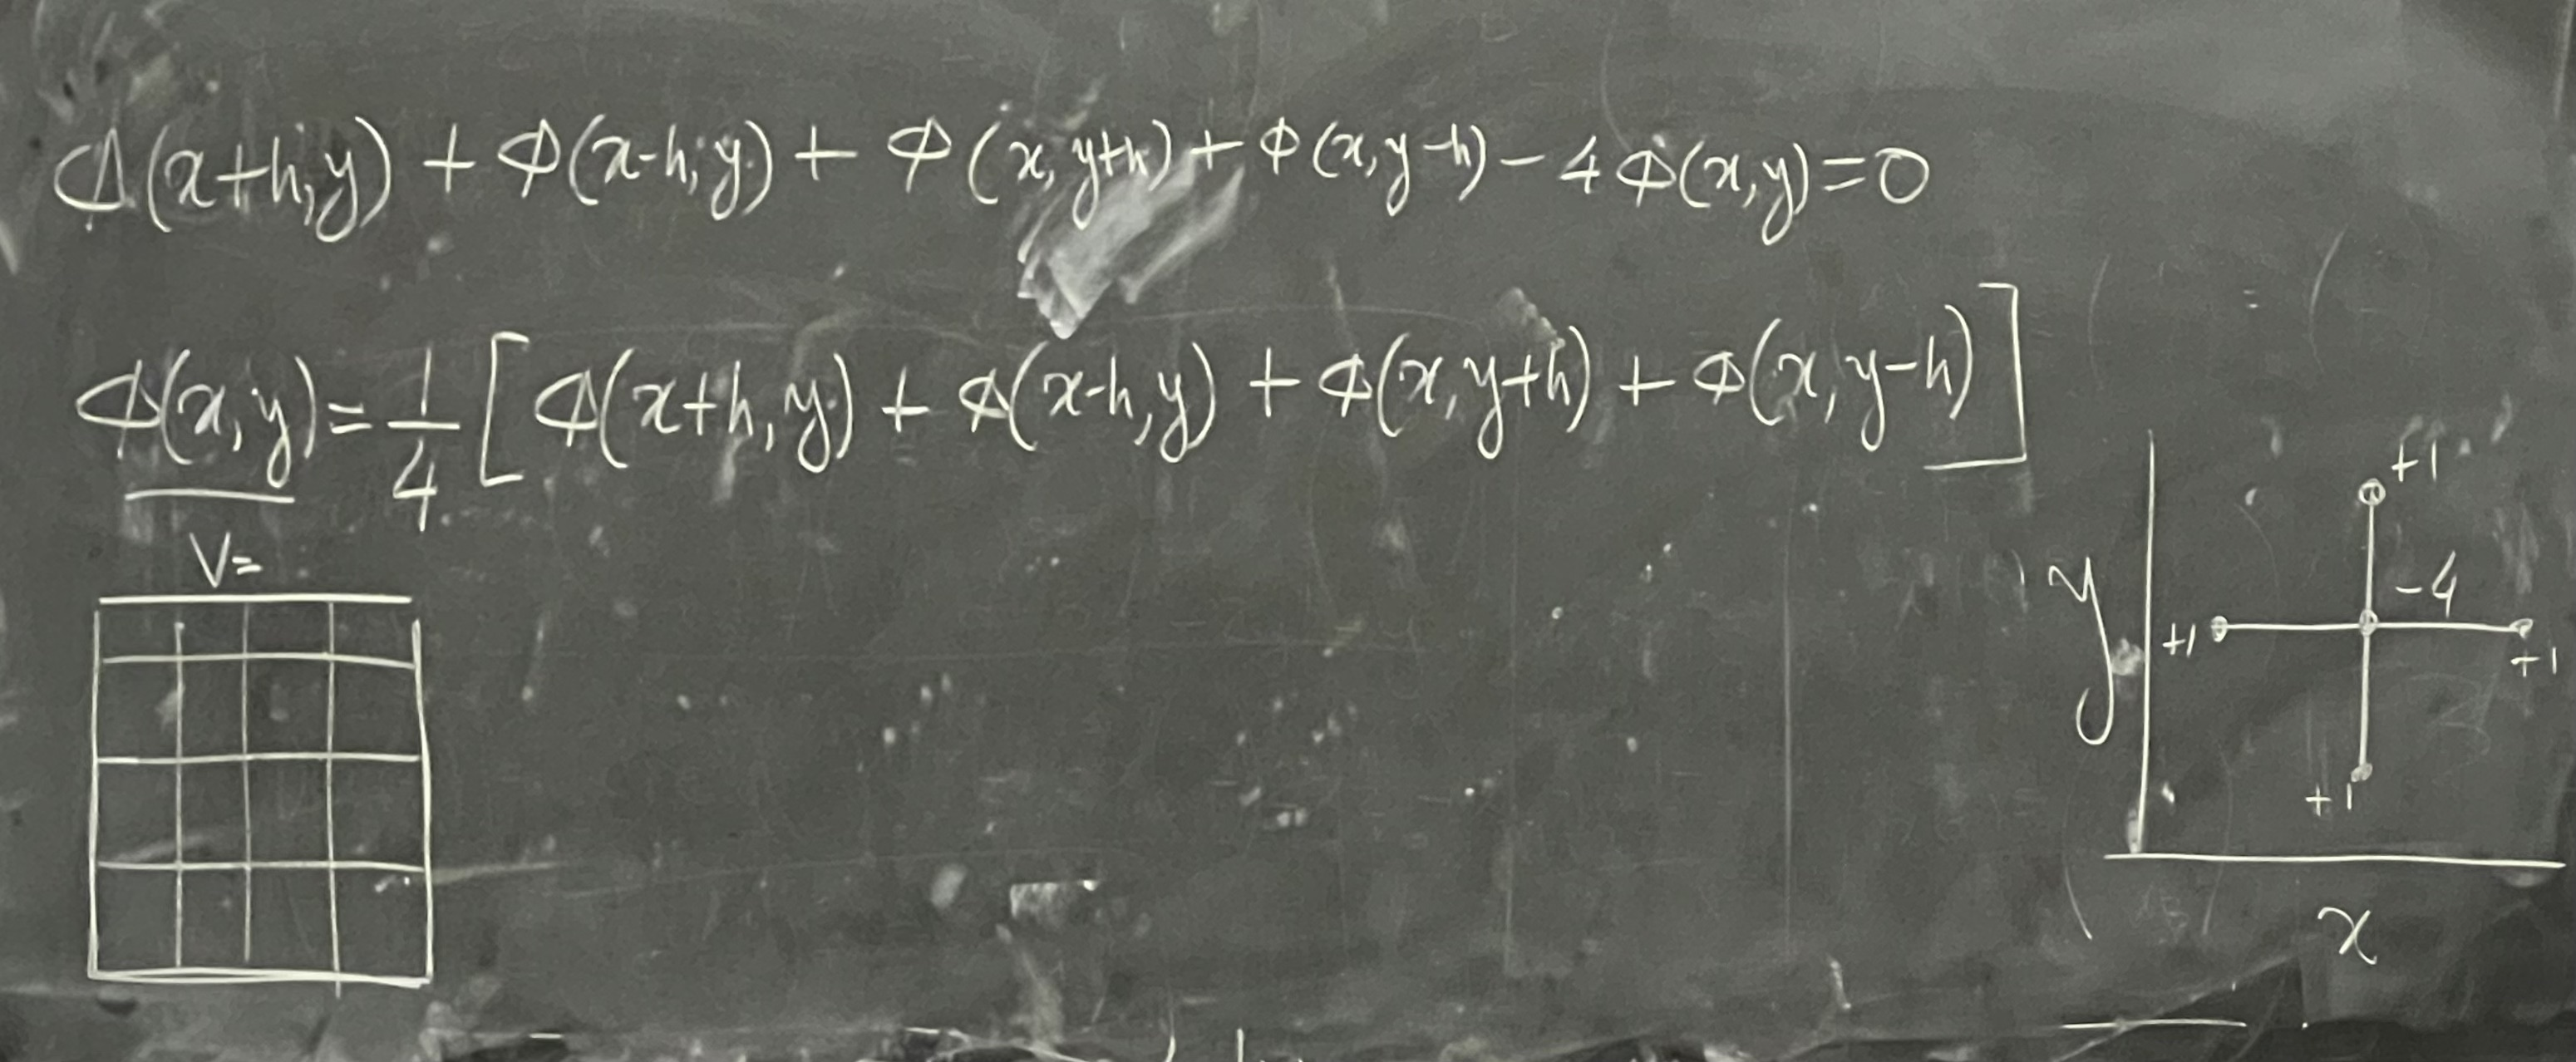

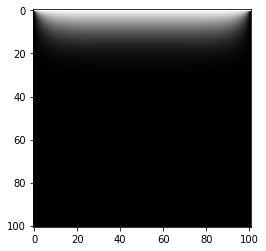

3.14292573928833


In [1]:
# Relaxation Method with Laplace equation
import numpy as np
from pylab import imshow, gray, show
import time

start_time = time.time()

def main(): 
    # define constants 
    
    # number of squre on a side
    M = 100
    
    # voltage at the top wall 
    V = 1.0
    
    # tolerance of the solution 
    tol = 1e-3
    
    # create arrays to hold the potential values 
    phi = np.zeros([M + 1, M + 1], float)
    phi[0, :] = V
    phi_prime = np.empty([M + 1, M + 1], float)
    
    # main loop 
    
    # specify difference 
    delta = 1.0
    
    while delta > tol: 
        for i in range(M+1):
            for j in range(M+1):
                if i == 0 or i == M or j == 0 or j == M: 
                    # on the boundary; don't change the values
                    phi_prime[i,j] = phi[i,j]
                else:
                    # not on boundary; change values
                    phi_prime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4.0
                    
        # calculate the maximum difference from old values 
        diff = abs(phi - phi_prime)
        delta = np.amax(diff)
        
        # swap the two arrays around 
        phi, phi_prime = phi_prime, phi
        
    # make a plot
    imshow(phi)
    gray()
    show()
    
main()  
end_time = time.time()

diff = end_time - start_time
print(diff)

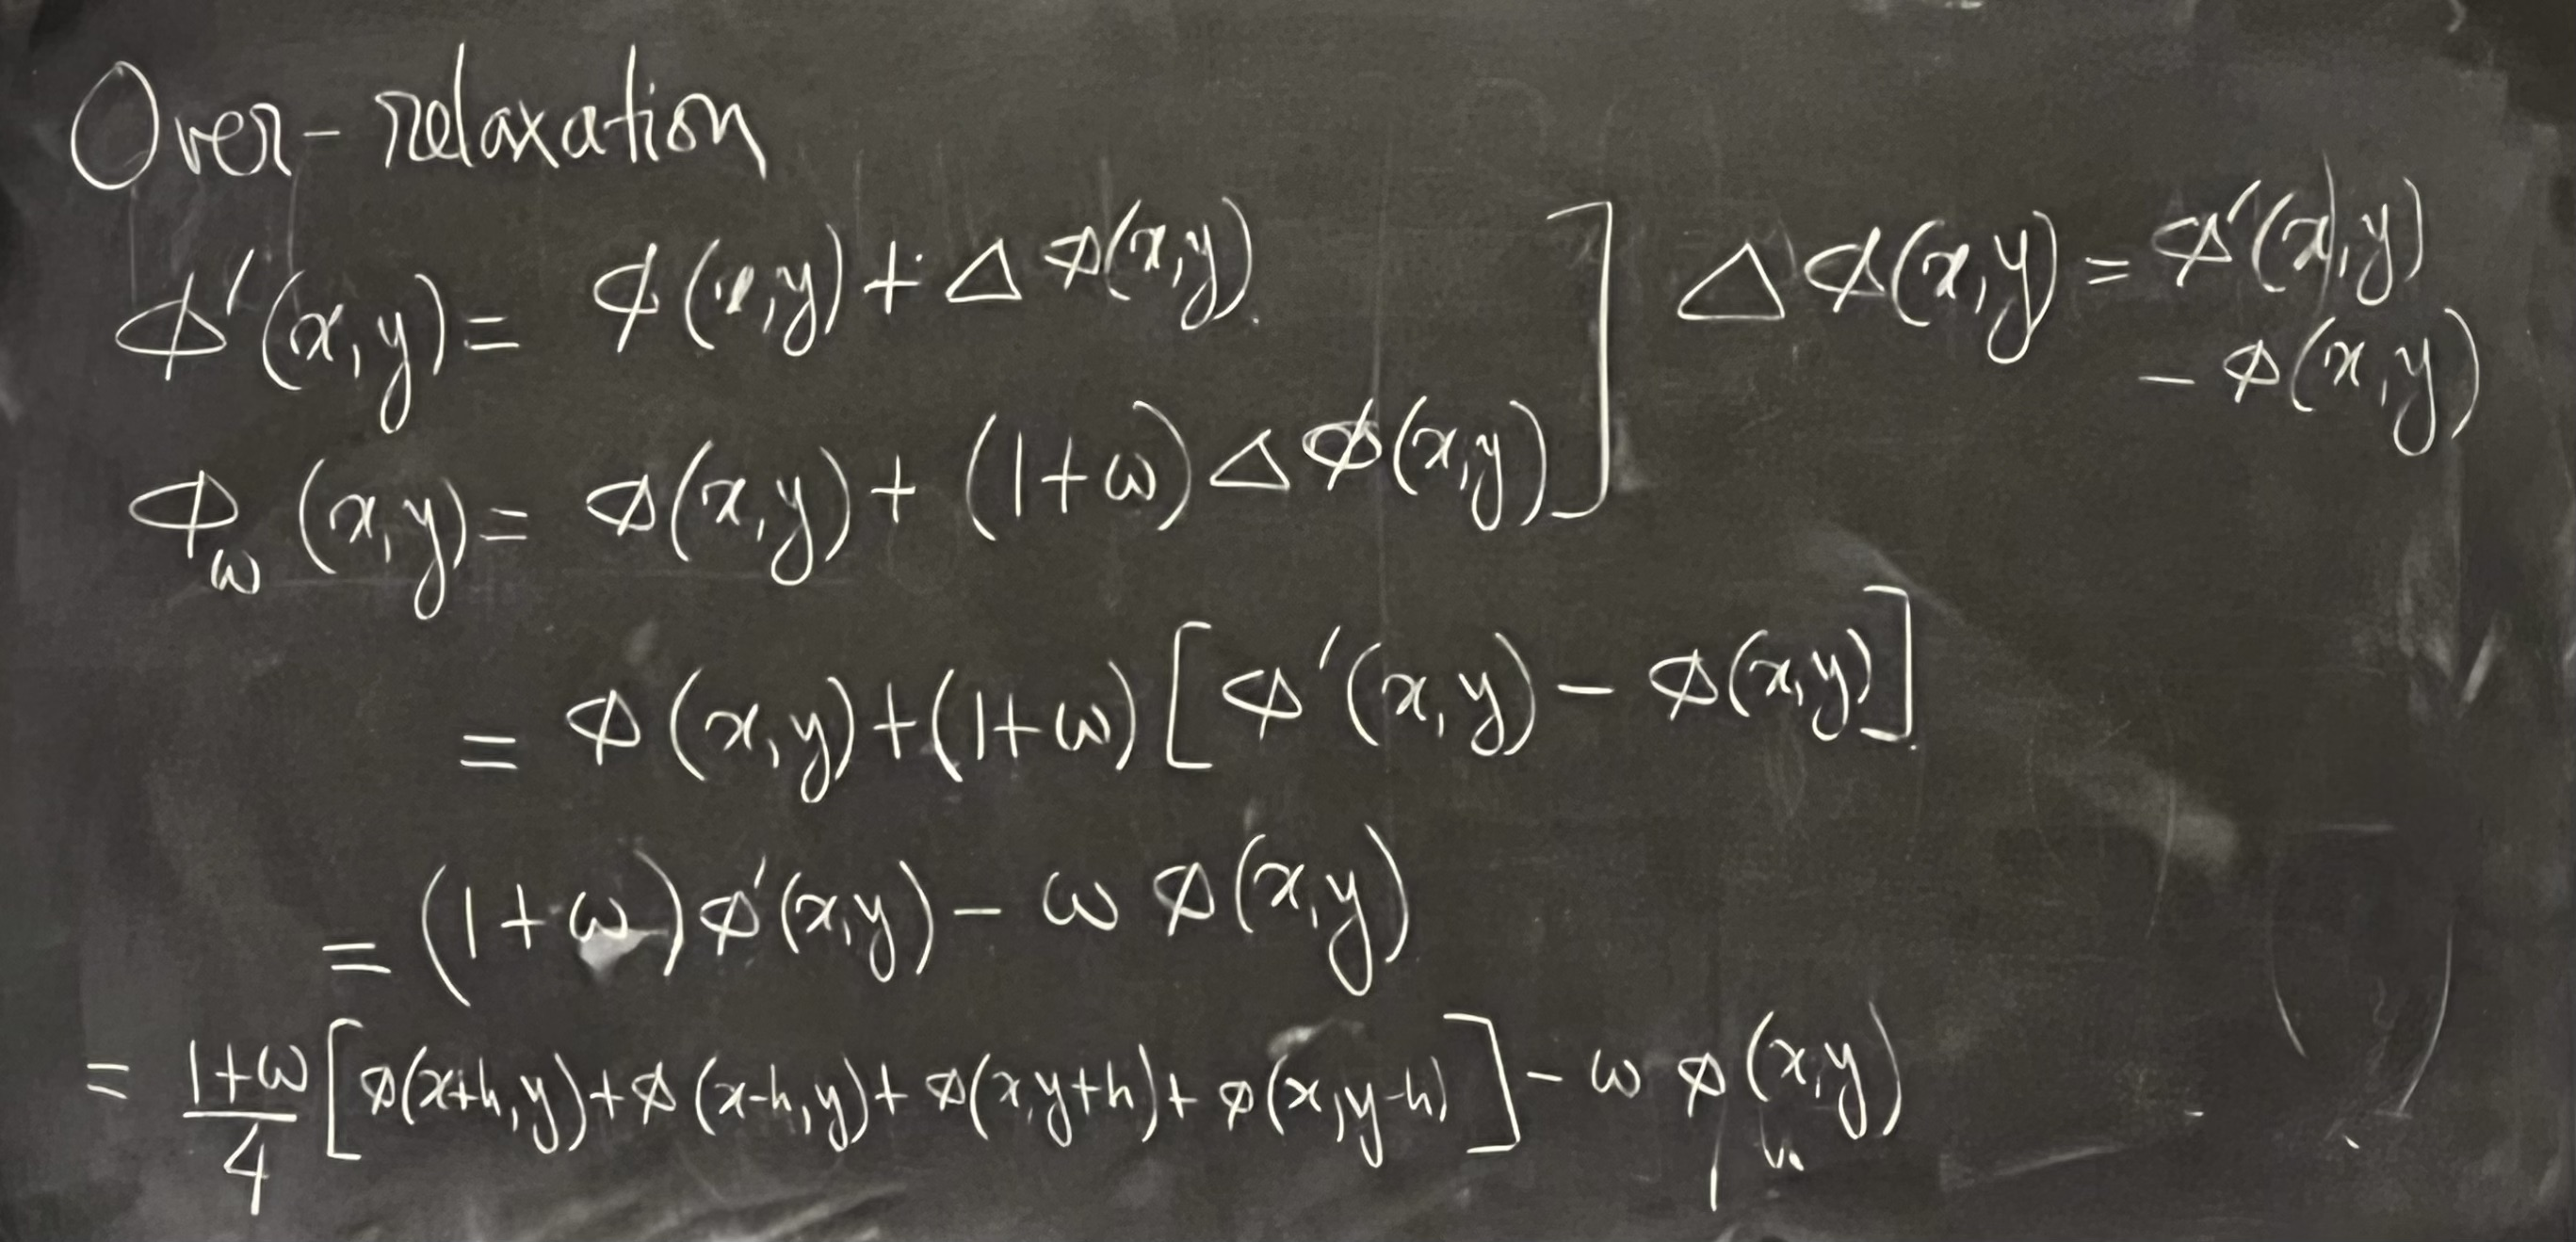

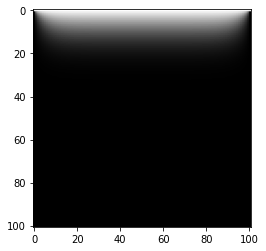

3.9222447872161865


In [2]:
# Over-Relaxation Method with Laplace equation
import numpy as np
from pylab import imshow, gray, show

start_time = time.time()

def main(): 
    # define constants 
    
    # number of squre on a side
    M = 100
    
    # voltage at the top wall 
    V = 1.0
    
    # tolerance of the solution 
    tol = 1e-3
    
    # create arrays to hold the potential values 
    phi = np.zeros([M + 1, M + 1], float)
    phi[0, :] = V
    phi_prime = np.empty([M + 1, M + 1], float)
    
    # main loop 
    
    # specify difference 
    delta = 1.0
    
    # specify a w value
    w = 0.01
    
    while delta > tol: 
        for i in range(M+1):
            for j in range(M+1):
                if i == 0 or i == M or j == 0 or j == M: 
                    # on the boundary; don't change the values
                    phi_prime[i,j] = phi[i,j]
                else:
                    # not on boundary; change values
                    phi_prime[i,j] = ((1.0 + w)/4.0)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) - w*phi[i,j]
                    
        # calculate the maximum difference from old values 
        diff = abs(phi - phi_prime)
        delta = np.amax(diff)
        
        # swap the two arrays around 
        phi, phi_prime = phi_prime, phi
        
    # make a plot
    imshow(phi)
    gray()
    show()
    
main()  

end_time = time.time()

diff = end_time - start_time

print(diff)

In [ ]:
# No Phi' and Over-Relaxation Method with Laplace equation
import numpy as np
from pylab import imshow, gray, show
import time

start_time = time.time()

def main(): 
    # define constants 
    
    # number of squre on a side
    M = 100
    
    # voltage at the top wall 
    V = 1.0
    
    # tolerance of the solution 
    tol = 1e-3
    
    # create arrays to hold the potential values 
    phi = np.zeros([M + 1, M + 1], float)
    phi[0, :] = V
    
    # main loop 
    
    # specify difference 
    delta = 1.0
    max_now = 2.0
    
    while max_now > tol: 
        for i in range(M+1):
            for j in range(M+1):
                if i == 0 or i == M or j == 0 or j == M: 
                    # on the boundary; don't change the values
                    continue
                else:
                    # not on boundary; change values
                    temp = phi[i,j]
                    phi[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4.0
                    delta = abs(temp - phi[i,j])
                    if delta > max_now: 
                        max_now = delta
        
    # make a plot
    imshow(phi)
    gray()
    show()
    
main()  
end_time = time.time()

diff = end_time - start_time
print(diff)